In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df= pd.read_csv('dataSLSHSLpqr.csv')

df.head(11)

,p,q,r,A1,L1,A2,L2,A3,L3
0,3,2,2,0.697272,588,0.897795,622,0.673578,655
1,3,3,2,0.737086,592,0.917456,621,0.701330,650
2,3,4,2,0.731879,595,0.917330,621,0.696167,647
3,3,5,2,0.608153,596,0.905459,621,0.632662,645
4,3,6,2,0.492272,597,0.892537,621,0.527849,644
5,3,7,2,0.412174,598,0.882359,621,0.404073,643
6,3,8,2,0.273795,598,0.875351,621,0.301801,643
7,3,9,2,0.199852,599,0.870844,621,0.206111,643
8,3,2,3,0.739739,592,0.829748,621,0.684369,651
9,3,3,3,0.781619,596,0.895376,621,0.726220,645


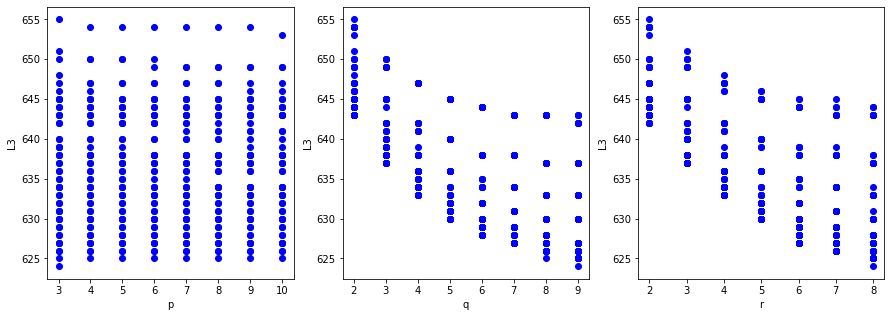

In [4]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df.p, df.L3,  color='blue')
#plt.ylim(0,1)
#plt.xlim(0,11)
plt.xlabel("p")
plt.ylabel("L3")
plt.subplot(1,3,2)
plt.scatter(df.q, df.L3,  color='blue')
#plt.ylim(0,1)
#plt.xlim(0,11)
plt.xlabel("q")
plt.ylabel("L3")
plt.subplot(1,3,3)
plt.scatter(df.r, df.L3,  color='blue')
#plt.ylim(0,1)
#plt.xlim(0,11)
plt.xlabel("r")
plt.ylabel("L3")
plt.show()

In [5]:
cdf = df[['p','q','r','L3']]
cdf.head(9)

,p,q,r,L3
0,3,2,2,655
1,3,3,2,650
2,3,4,2,647
3,3,5,2,645
4,3,6,2,644
5,3,7,2,643
6,3,8,2,643
7,3,9,2,643
8,3,2,3,651


In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
len(df)

448

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['p','q','r']])
y = np.asanyarray(train[['L3']])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)
regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('intercepts: ', regr.intercept_)

Coefficients:  [[-0.07082953 -1.96637668 -2.40932001]]
intercepts:  [659.76409374]


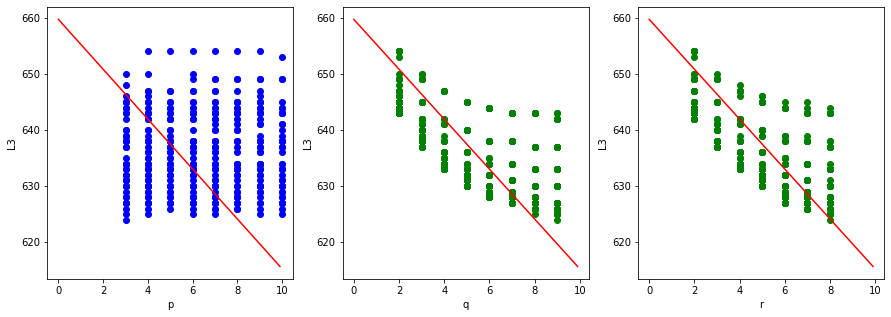

In [764]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(train.p, train.L3,  color='blue')
plt.xlabel("p")
plt.ylabel("L3")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX + regr.coef_[0][2]*XX
plt.plot(XX, yy, '-r' )
#plt.ylim(0,1)
#plt.xlim(0,11)

plt.subplot(1,3,2)
plt.scatter(train.q, train.L3,  color='green')
plt.xlabel("q")
plt.ylabel("L3")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX  + regr.coef_[0][2]*XX
#plt.ylim(0,1)
#plt.xlim(0,11)
plt.plot(XX, yy, '-r' )

plt.subplot(1,3,3)
plt.scatter(train.r, train.L3,  color='green')
plt.xlabel("r")
plt.ylabel("L3")
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX  + regr.coef_[0][2]*XX
#plt.ylim(0,1)
#plt.xlim(0,11)
plt.plot(XX, yy, '-r' )


In [8]:
y_hat= regr.predict(x_test)
x = np.asanyarray(x_test)
y = np.asanyarray(y_test)

from sklearn.metrics import r2_score 

print('Variance score: %.2f' % r2_score(y, y_hat))

Variance score: 0.84


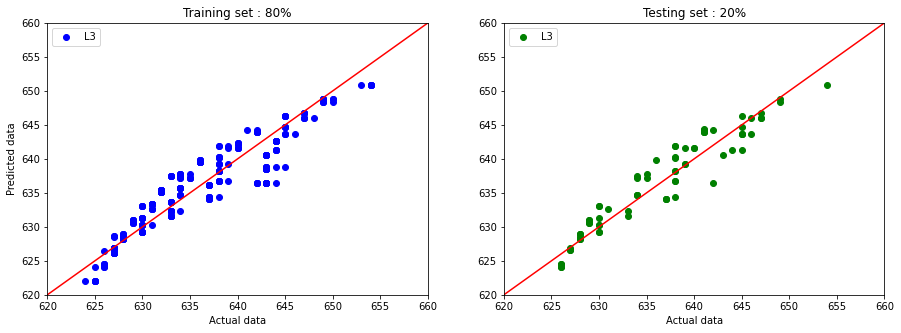

In [766]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y_pred_train = regr.intercept_[0]+ regr.coef_[0][0]*x_train[:,0] + regr.coef_[0][1]*x_train[:,1] + regr.coef_[0][2]*x_train[:,2]
plt.scatter(  y_train , y_pred_train, color='blue' , label='L3')
plt.xlabel("Actual data")
plt.ylabel("Predicted data")
XX = np.arange(0.0, 1000.0, 0.1)
#yy = regr.intercept_[0]+ regr.coef_[0][0]*XX + regr.coef_[0][1]*XX
yy = XX
plt.plot(XX, yy, '-r' )
plt.ylim(620,660)
plt.xlim(620,660)
plt.title('Training set : 80%')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Actual data")

yy = XX
plt.plot(XX, yy, '-r' )
y_pred_test = regr.intercept_[0]+ regr.coef_[0][0]*x_test[:,0] + regr.coef_[0][1]*x_test[:,1] + regr.coef_[0][2]*x_test[:,2]
plt.ylim(620,660)
plt.xlim(620,660)
plt.scatter( y_test ,y_pred_test,  color='green', label='L3')
plt.title('Testing set : 20%')
plt.legend()

In [13]:
print(y_train)

[[633]
 [634]
 [634]
 [633]
 [636]
 [647]
 [643]
 [626]
 [631]
 [649]
 [643]
 [638]
 [634]
 [643]
 [639]
 [639]
 [645]
 [650]
 [634]
 [634]
 [644]
 [628]
 [647]
 [645]
 [630]
 [640]
 [645]
 [645]
 [647]
 [640]
 [636]
 [632]
 [630]
 [633]
 [627]
 [643]
 [630]
 [632]
 [635]
 [637]
 [637]
 [629]
 [645]
 [636]
 [643]
 [630]
 [642]
 [630]
 [634]
 [642]
 [641]
 [637]
 [636]
 [643]
 [632]
 [631]
 [643]
 [630]
 [625]
 [649]
 [654]
 [633]
 [644]
 [645]
 [645]
 [631]
 [638]
 [634]
 [645]
 [633]
 [641]
 [629]
 [645]
 [638]
 [629]
 [628]
 [633]
 [633]
 [627]
 [627]
 [638]
 [638]
 [645]
 [639]
 [627]
 [636]
 [626]
 [634]
 [637]
 [654]
 [630]
 [643]
 [645]
 [640]
 [645]
 [634]
 [634]
 [637]
 [649]
 [634]
 [630]
 [632]
 [647]
 [630]
 [630]
 [638]
 [633]
 [643]
 [644]
 [649]
 [637]
 [643]
 [626]
 [627]
 [631]
 [630]
 [638]
 [631]
 [647]
 [643]
 [645]
 [645]
 [630]
 [648]
 [628]
 [642]
 [644]
 [627]
 [644]
 [627]
 [641]
 [642]
 [638]
 [634]
 [635]
 [637]
 [626]
 [642]
 [633]
 [633]
 [633]
 [637]
 [634]

In [15]:
print(y_pred_train)

NameError: name 'y_pred_train' is not defined

In [14]:
print(y_test)

[[638]
 [641]
 [637]
 [630]
 [630]
 [633]
 [637]
 [640]
 [636]
 [642]
 [654]
 [636]
 [630]
 [638]
 [630]
 [643]
 [638]
 [645]
 [633]
 [643]
 [626]
 [627]
 [638]
 [630]
 [634]
 [638]
 [638]
 [638]
 [638]
 [635]
 [630]
 [635]
 [632]
 [654]
 [654]
 [627]
 [646]
 [633]
 [631]
 [642]
 [635]
 [647]
 [627]
 [631]
 [638]
 [638]
 [629]
 [645]
 [638]
 [631]
 [644]
 [633]
 [629]
 [643]
 [643]
 [633]
 [643]
 [636]
 [628]
 [630]
 [645]
 [638]
 [642]
 [627]
 [631]
 [637]
 [638]
 [649]
 [633]
 [628]
 [629]
 [631]
 [637]]
